# Import de Librerías necesarias

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split, KFold, GroupKFold

import xgboost as xgb
import lightgbm as lgb
import os
import warnings

warnings.filterwarnings('ignore')

# Cargar Competición de Kaggle

In [36]:
os.environ['KAGGLE_CONFIG_DIR'] = "."
!chmod 600 ./kaggle.json

In [38]:
!kaggle c ompetitions download -c ubaar-competition

usage: kaggle competitions [-h] {list,files,download,submit,submissions,leaderboard} ...
kaggle competitions: error: argument command: invalid choice: 'ompetitions' (choose from 'list', 'files', 'download', 'submit', 'submissions', 'leaderboard')


In [39]:
!unzip ubaar-competition.zip

Archive:  ubaar-competition.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [74]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [75]:
train_data.head()

,ID,date,sourceLatitude,sourceLongitude,SourceState,destinationLatitude,destinationLongitude,destinationState,distanceKM,taxiDurationMin,vehicleType,vehicleOption,weight,price
0,88142929797,960218,36.666045,48.489706,زنجان,29.600574,52.537114,فارس,1092.0,751.0,treili,kafi,20.00,15300000
1,30842979862,960511,32.323951,50.855412,چهارمحال و بختیاری,34.644923,50.876092,قم,414.0,264.0,khavar,mosaghaf_felezi,2.50,1800000
2,54262798716,960602,32.575448,51.581011,اصفهان,31.819508,49.865235,خوزستان,310.0,292.0,joft,kompressi,14.97,3742000
3,64071173752,960319,35.029685,48.085763,کردستان,35.703801,51.398824,تهران,391.0,271.0,khavar,mosaghaf_felezi,2.50,1300000
4,68088966447,960609,31.586965,54.449607,یزد,36.730367,53.965480,گلستان,756.0,573.0,joft,bari,15.00,8870000


In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    50000 non-null  int64  
 1   date                  50000 non-null  int64  
 2   sourceLatitude        50000 non-null  float64
 3   sourceLongitude       50000 non-null  float64
 4   SourceState           50000 non-null  object 
 5   destinationLatitude   50000 non-null  float64
 6   destinationLongitude  50000 non-null  float64
 7   destinationState      50000 non-null  object 
 8   distanceKM            49997 non-null  float64
 9   taxiDurationMin       49997 non-null  float64
 10  vehicleType           50000 non-null  object 
 11  vehicleOption         50000 non-null  object 
 12  weight                50000 non-null  float64
 13  price                 50000 non-null  int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 5.3+ MB


In [ ]:
test_data.head()

,ID,date,sourceLatitude,sourceLongitude,SourceState,destinationLatitude,destinationLongitude,destinationState,distanceKM,taxiDurationMin,vehicleType,vehicleOption,weight
0,10010571124,960630,36.297213,59.607970,خراسان رضوی,35.579635,53.384990,سمنان,684.0,446.0,khavar,mosaghaf_chadori,2.33
1,10031704713,960316,35.704695,51.405194,تهران,29.605761,52.533588,فارس,931.0,614.0,treili,kafi,19.14
2,10040911649,960221,26.948490,55.583875,هرمزگان,36.299593,59.612010,خراسان رضوی,1469.0,1009.0,treili,kafi,22.00
3,10047106840,960622,35.339066,52.075970,سمنان,35.248298,58.457567,خراسان رضوی,745.0,496.0,khavar,mosaghaf_felezi,2.50
4,10050126039,960519,35.579577,53.394403,سمنان,34.636832,50.874888,قم,281.0,181.0,treili,labehdar,23.50


In [76]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    15000 non-null  int64  
 1   date                  15000 non-null  int64  
 2   sourceLatitude        15000 non-null  float64
 3   sourceLongitude       15000 non-null  float64
 4   SourceState           15000 non-null  object 
 5   destinationLatitude   15000 non-null  float64
 6   destinationLongitude  15000 non-null  float64
 7   destinationState      15000 non-null  object 
 8   distanceKM            14998 non-null  float64
 9   taxiDurationMin       14998 non-null  float64
 10  vehicleType           15000 non-null  object 
 11  vehicleOption         15000 non-null  object 
 12  weight                15000 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 1.5+ MB


In [ ]:
train_data.isnull().sum()

ID                      0
date                    0
sourceLatitude          0
sourceLongitude         0
SourceState             0
destinationLatitude     0
destinationLongitude    0
destinationState        0
distanceKM              3
taxiDurationMin         3
vehicleType             0
vehicleOption           0
weight                  0
price                   0
dtype: int64

In [ ]:
test_data.isnull().sum()

ID                      0
date                    0
sourceLatitude          0
sourceLongitude         0
SourceState             0
destinationLatitude     0
destinationLongitude    0
destinationState        0
distanceKM              2
taxiDurationMin         2
vehicleType             0
vehicleOption           0
weight                  0
dtype: int64

## Distribución de la variable objetivo (precio)

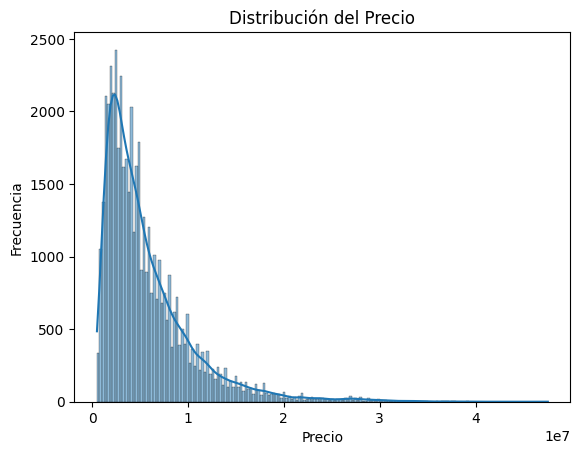

In [77]:
sns.histplot(train_data['price'], kde=True)
plt.title('Distribución del Precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


## Correlación entre las variables numéricas

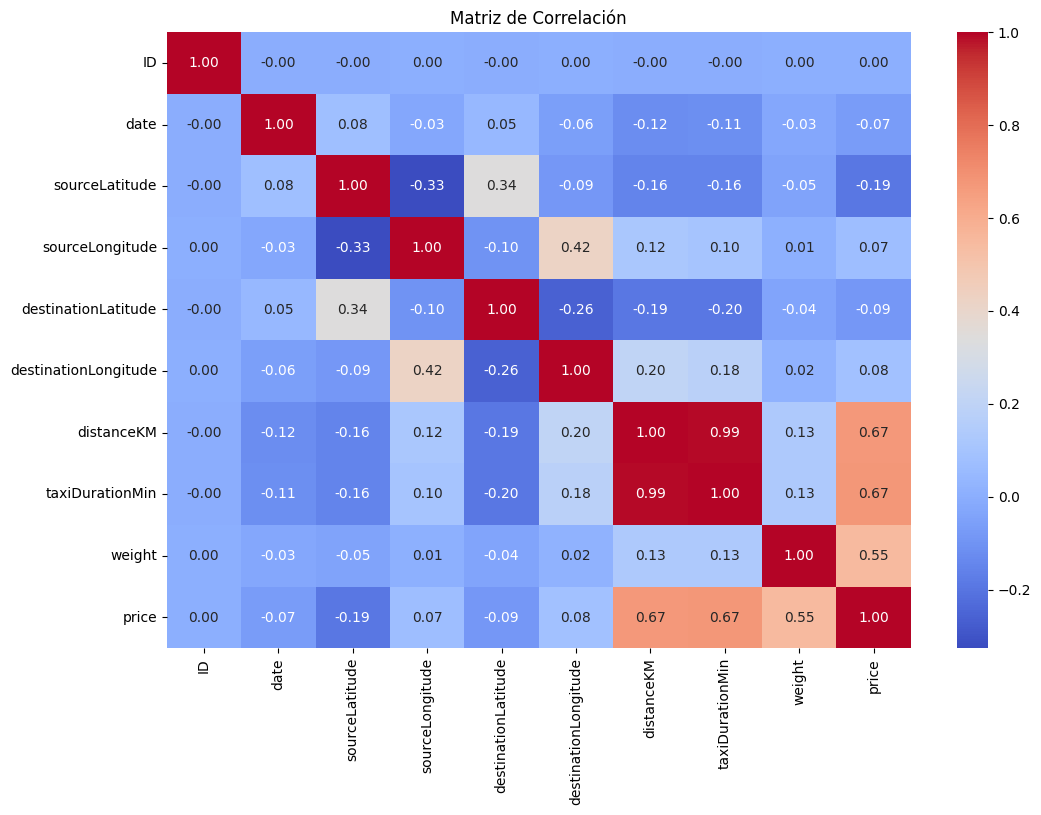

In [79]:
corr_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

## Distribución de algunas variables numéricas

Distribución de la Distancia en relación con la Frecuencia

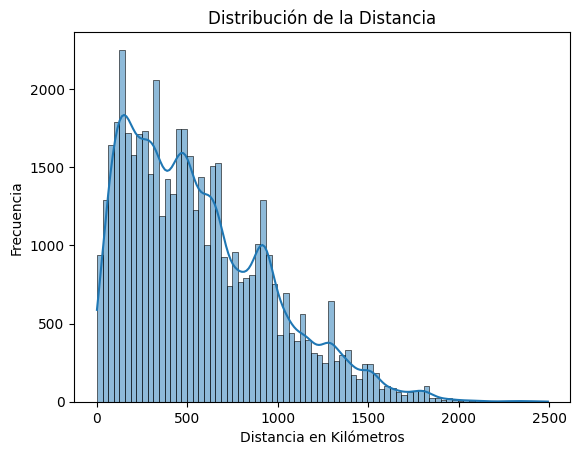

In [80]:
sns.histplot(train_data['distanceKM'], kde=True)
plt.title('Distribución de la Distancia')
plt.xlabel('Distancia en Kilómetros')
plt.ylabel('Frecuencia')
plt.show()

Distribución del tiempo del taxi en relación con la frecuencia

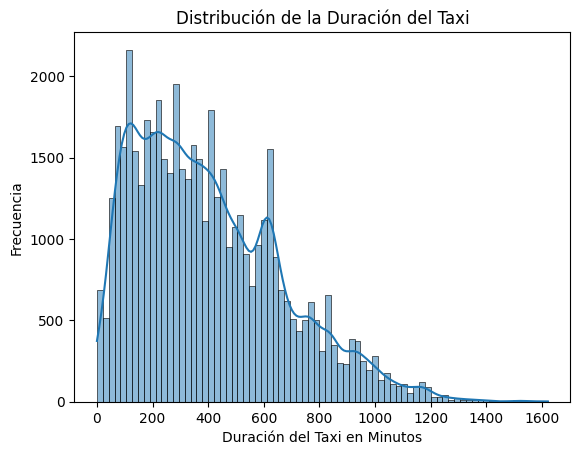

In [81]:
sns.histplot(train_data['taxiDurationMin'], kde=True)
plt.title('Distribución de la Duración del Taxi')
plt.xlabel('Duración del Taxi en Minutos')
plt.ylabel('Frecuencia')
plt.show()


# Preprocesamiento de datos


### Dividir el conjunto de datos de entrenamiento en características (X) y variable objetivo (y)


In [82]:
X = train_data.drop(columns=['price'])
y = train_data['price']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos de datos
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (40000, 13)
Forma de X_test: (10000, 13)
Forma de y_train: (40000,)
Forma de y_test: (10000,)


### Crear una lista de características numéricas y categóricas para el preprocesamiento


In [83]:
# Definir columnas numéricas y categóricas
numeric_features = ['sourceLatitude', 'sourceLongitude', 'destinationLatitude', 'destinationLongitude', 'distanceKM', 'taxiDurationMin', 'weight']
categorical_features = ['SourceState', 'destinationState', 'vehicleType', 'vehicleOption']

### Definir transformadores para el preprocesamiento de datos


In [84]:
# Definir transformadores para las columnas numéricas y categóricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Imputa los valores faltantes con la mediana
    ('scaler', preprocessing.StandardScaler())  # Escala las características numéricas
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputa los valores faltantes con la moda
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Codifica las variables categóricas con One-Hot Encoding
])

### Aplicar preprocesamiento a las características


In [85]:
# Combinar los transformadores en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ]
)

# Random Forest

In [86]:
# Reducir el tamaño de los datos utilizando una muestra aleatoria
sample_size = 10000  # Define el tamaño de la muestra
X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train, y_train, train_size=sample_size, random_state=42)


In [88]:
# Definir el modelo Random Forest
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Crear el pipeline con preprocesamiento y modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', random_forest)])

# Entrenar el pipeline con la muestra aleatoria reducida
pipeline.fit(X_train_sampled, y_train_sampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['sourceLatitude',
                                                   'sourceLongitude',
                                                   'destinationLatitude',
                                                   'destinationLongitude',
                                                   'distanceKM',
                                                   'taxiDurationMin',
                                                   'weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SourceState',
                                                   'destinationState',
                                                   'vehicleType',
                                                   'vehicleOption'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [89]:
y_pred = pipeline.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Error absoluto medio (MAE): {mae}')
print(f'Coeficiente de determinación (R^2): {r2}')

Error cuadrático medio (MSE): 3263470205292.169
Error absoluto medio (MAE): 1118146.4700238097
Coeficiente de determinación (R^2): 0.8553334793820693


### Conclusiones (Random Forest)

**Error Cuadrático Medio (MSE):** Este valor es bastante alto, lo que indica que el modelo tiene dificultades para ajustarse perfectamente a los datos de entrenamiento. En términos prácticos, esto significa que las predicciones del modelo están bastante alejadas de los valores reales de los costos de transporte.

**Error Absoluto Medio (MAE):** El MAE indica la magnitud promedio de los errores en las predicciones. En este caso, el MAE es considerablemente alto, lo que sugiere que las predicciones del modelo están desviadas en promedio por más de un millón de Riales respecto a los valores reales.

**Coeficiente de Determinación (R^2):** El R^2 es una medida de la capacidad del modelo para explicar la variabilidad de los datos. Un valor de 0.855 indica que el modelo es capaz de explicar aproximadamente el 85.5% de la variabilidad en los datos de entrenamiento, lo cual es relativamente alto pero aún deja margen de mejora.

Dadas estas métricas, podemos concluir que el modelo Random Forest tiene un buen poder explicativo en términos generales, pero sus predicciones presentan un alto nivel de error, especialmente en cuanto al costo absoluto de transporte. Esto sugiere que el modelo podría beneficiarse de una mayor optimización o de la exploración de otros algoritmos de regresión que puedan mejorar su precisión en la predicción de los costos de transporte para la competición de Ubaar & SADA.

# XGBoost

In [90]:
# Definir el modelo XGBoost
xgboost_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Crear el pipeline con preprocesamiento y modelo
pipeline_xgboost = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', xgboost_model)])

# Entrenar el pipeline con la muestra aleatoria reducida
pipeline_xgboost.fit(X_train_sampled, y_train_sampled)

# Predecir y evaluar en el conjunto de prueba
y_pred_xgboost = pipeline_xgboost.predict(X_test)

In [96]:
# Calcular métricas para XGBoost
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)
r2_xgboost = r2_score(y_test, y_pred_xgboost)

print(f'XGBoost - Error cuadrático medio en prueba: {mse_xgboost}')
print(f'XGBoost - Error absoluto medio en prueba: {mae_xgboost}')
print(f'XGBoost - Coeficiente de determinación (R^2) en prueba: {r2_xgboost}')


XGBoost - Error cuadrático medio en prueba: 3082264012957.882
XGBoost - Error absoluto medio en prueba: 1087994.218540625
XGBoost - Coeficiente de determinación (R^2) en prueba: 0.8633661770046535


### Conclusiones

Podemos observar que el modelo XGBoost tiene un MSE ligeramente menor y un MAE también menor en comparación con el modelo Random Forest. Además, el coeficiente de determinación (R^2) es más alto para XGBoost, lo que indica que este modelo explica mejor la variabilidad de los datos en comparación con Random Forest. En general, el modelo XGBoost muestra un rendimiento ligeramente superior en la predicción de los costos de transporte en este contexto.